In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read in data:
taxi_zone = pd.read_csv("taxi+_zone_lookup.csv")
trip_data = pd.read_csv("yellow_tripdata_2017-06.csv")

In [4]:
# format data
trip_data.tpep_pickup_datetime = pd.to_datetime(trip_data.tpep_pickup_datetime)
trip_data.tpep_dropoff_datetime = pd.to_datetime(trip_data.tpep_dropoff_datetime)
trip_data["trip_day"] = trip_data.tpep_pickup_datetime.apply(lambda x: x.dayofweek)
trip_data["trip_hour"] = trip_data.tpep_pickup_datetime.apply(lambda x: x.hour)
trip_data["duration"] = trip_data.tpep_dropoff_datetime-trip_data.tpep_pickup_datetime
trip_data["duration"] = trip_data["duration"].astype('timedelta64[m]')

In [5]:
trip_data = trip_data[trip_data.passenger_count<=4]
trip_data = trip_data[trip_data.payment_type.isin([1,2])]

In [6]:
trip_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_day,trip_hour,duration
4,1,2017-06-01 00:00:00,2017-06-01 00:03:43,1,0.60,1,N,140,141,1,4.5,0.5,0.5,2.00,0.00,0.3,7.80,3,0,3.0
5,2,2017-06-01 00:00:00,2017-06-01 00:00:00,2,17.57,2,N,132,74,1,52.0,0.0,0.5,11.71,5.76,0.3,70.27,3,0,0.0
7,2,2017-06-01 00:00:00,2017-06-01 00:00:00,1,18.08,2,N,132,230,2,52.0,4.5,0.5,0.00,5.76,0.3,63.06,3,0,0.0
8,1,2017-06-01 00:00:01,2017-06-01 00:01:43,1,0.20,1,N,148,148,2,3.0,0.5,0.5,0.00,0.00,0.3,4.30,3,0,1.0
9,1,2017-06-01 00:00:01,2017-06-01 00:08:36,1,1.90,1,N,114,170,1,8.5,0.5,0.5,1.95,0.00,0.3,11.75,3,0,8.0


In [11]:
taxi_zone.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [8]:
use_cols = ['passenger_count', 'trip_distance','PULocationID', 'DOLocationID', 'payment_type',
       'total_amount', 'trip_day', 'trip_hour', 'duration']
df_trip = trip_data[use_cols].merge(taxi_zone,how="left",left_on="PULocationID",right_on="LocationID")
df_trip["day_hour"] = df_trip.trip_day*24+df_trip.trip_hour

In [19]:
df_trip.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,trip_day,trip_hour,duration,LocationID,Borough,Zone,service_zone
0,1,0.60,140,141,1,7.80,3,0,3.0,140,Manhattan,Lenox Hill East,Yellow Zone
1,2,17.57,132,74,1,70.27,3,0,0.0,132,Queens,JFK Airport,Airports
2,1,18.08,132,230,2,63.06,3,0,0.0,132,Queens,JFK Airport,Airports
3,1,0.20,148,148,2,4.30,3,0,1.0,148,Manhattan,Lower East Side,Yellow Zone
4,1,1.90,114,170,1,11.75,3,0,8.0,114,Manhattan,Greenwich Village South,Yellow Zone


In [29]:
df_trip_frq = pd.pivot_table(df_trip,index="trip_day",columns = "trip_hour",values="Borough",aggfunc='count')
df_trip_frq.index = ["Mon","Tue","Wed","Thur","Fri","Sat","Sun"]
df_trip_frq = df_trip_frq/1000

In [31]:
day_type_count = [4,4,4,5,5,4,4]
for i in range(7):
    df_trip_frq.iloc[i,:] = df_trip_frq.iloc[i,:]/day_type_count[i]

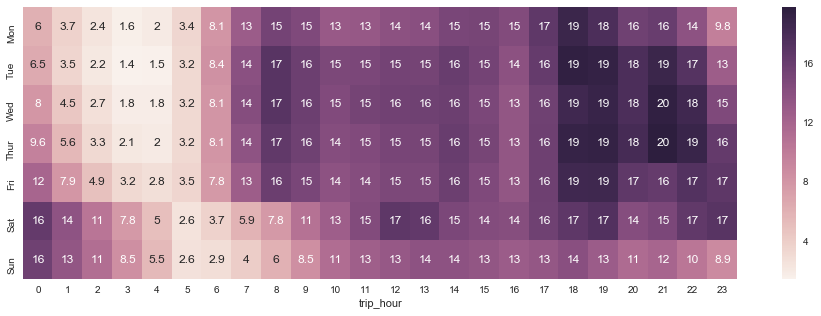

In [34]:
import seaborn as sns
plt.subplots(figsize=(16,5))
sns.heatmap(df_trip_frq, annot=True)

Based on this heatmap, the best time to work is during weekday evening. Although I have flexible hours, however, I prefer not to split 10 hours to many small intervals. At the same time, I would not want to continue to work for more than 4 hours. As a result, I inital working schedule should look like these:
Tuesday or Friday from 18:00 to 20:00
Wednesday and Thursday from 18:00 to 22:00

In [35]:
df_trip_frq

trip_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Mon,6.04700,3.71500,2.38425,1.62700,1.97700,3.38325,8.07275,12.80300,15.39725,14.67525,...,15.02325,15.18250,14.50525,16.59075,18.90700,17.78900,15.69500,16.15225,13.81475,9.7660
Tue,6.49950,3.52250,2.15300,1.44200,1.54675,3.24925,8.37750,13.93900,17.08475,15.86000,...,16.10175,15.42875,13.92050,16.28325,19.47675,19.36125,17.84550,18.90100,17.27850,12.6465
Wed,7.95675,4.48700,2.72425,1.76125,1.79975,3.19900,8.10875,14.28825,17.09800,15.80375,...,15.84875,14.99550,13.45625,15.64825,18.50800,19.08350,17.77275,19.52250,18.45550,14.7165
Thur,9.60540,5.59240,3.25500,2.12940,2.01200,3.24360,8.10020,13.65080,16.52880,15.59820,...,16.12220,15.22000,13.44780,15.76500,19.12860,19.36860,18.19260,19.81420,18.97620,16.3136
Fri,12.03160,7.94960,4.89360,3.21000,2.78300,3.48480,7.81920,12.67420,15.88260,15.01160,...,15.80820,14.68880,13.36380,15.72900,18.57260,18.64660,16.63220,16.26540,17.34560,16.6582
Sat,16.36250,13.68025,10.57975,7.81250,4.97975,2.58775,3.70275,5.90000,7.82775,10.81250,...,14.93475,14.41250,14.25100,15.68800,16.70800,17.39950,14.30950,14.96625,16.55875,17.0455
Sun,15.65000,13.46925,11.13975,8.51775,5.48225,2.63150,2.86275,4.04400,6.01325,8.53600,...,13.82225,13.42150,12.80075,13.34525,14.02000,12.78950,11.44300,11.94125,10.46025,8.8750


In [122]:
def get_demand(df_trip,day_of_week,hour_of_day):
    df = df_trip[df_trip.day_hour==day_of_week*24+hour_of_day].copy()
    df_demand = df.Zone.value_counts()
    if day_of_week in [3,4]:
        df_demand = df_demand/5
    else:
        df_demand = df_demand/4
    return df_demand
def get_expected_pay(df_trip,day_of_week,hour_of_day):
    df = df_trip[df_trip.day_hour==day_of_week*24+hour_of_day].copy()
    df_exp_pay = df.groupby(["Zone"]).mean()["total_amount"].sort_values(ascending=False)
    return df_exp_pay

def get_expected_pay_per_minute(df_trip,day_of_week,hour_of_day):
    df = df_trip[df_trip.day_hour==day_of_week*24+hour_of_day].copy()
    df.loc[df.duration==0,"duration"] = 1
    df["pay_rate"] = df.total_amount/df.duration
    df_exp_pay_rate = df.groupby(["Zone"]).mean()["pay_rate"].sort_values(ascending=False)
    return df_exp_pay_rate
def get_stats(df_trip,day_of_week,hour_of_day,waiting_cost_rate):
    df_exp_pay = get_expected_pay(df_trip,day_of_week,hour_of_day)
    df_exp_demand = get_demand(df_trip,day_of_week,hour_of_day)
    df_exp_pay_rate = get_expected_pay_per_minute(df_trip,day_of_week,hour_of_day)
    df_stats = pd.concat([df_exp_demand,df_exp_pay_rate,df_exp_pay],axis=1,sort=False)
    df_stats.columns = ["demand","pay_rate","total_amount"] 
    df_stats["wait_cost"] = 1/df_stats.demand*waiting_cost_rate
    return df_stats

In [123]:
day_of_week = 4
hour_of_day = 18
waiting_cost_rate = 1
df_stats = get_stats(df_trip,day_of_week,hour_of_day,waiting_cost_rate)

In [124]:
df_stats.head()

,demand,pay_rate,total_amount,wait_cost
Midtown Center,862.4,1.210002,14.975371,0.001160
Upper East Side South,779.8,1.564615,12.658892,0.001282
Midtown East,774.6,1.310127,15.232455,0.001291
Murray Hill,705.0,1.324535,14.769688,0.001418
Union Sq,698.0,1.373216,13.766086,0.001433
